In [261]:
# Initial imports
from path import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import psycopg2 as pg

In [262]:
engine = pg.connect("dbname='postgres' user='postgres' host='database-final.cjdbapst3wjf.us-east-1.rds.amazonaws.com' port='5432' password='FinalProject05'")
Contributions = pd.read_sql('select * from merged_2013', con=engine)
Contributions.head()
Contributions.dropna()

,election,candidateid,candidatename,date,contributiontype,city,state,zipcode,amount,matchamt,prevamt,totalamount,expenditure_amount,purposecode,purpose
0,2013,1752,"Abiodun,Laurel-Smith",2013-09-07,Corporation,New York,NY,10001,0.0,0.0,0.0,0.0,54,Office Expenses,Office Expenses
1,2013,260,"William,Thompson, Jr.",2012-01-17,Corporation,New York,NY,10019,0.0,0.0,0.0,0.0,19,Other,Other: explntion
2,2013,FI,"John,Liu",2013-07-12,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,110,Office Expenses,Office Expenses
3,2013,FI,"John,Liu",2013-04-15,Limited Liability Company,Flushing,NY,11355,0.0,0.0,0.0,0.0,250,Fundraising,Fundraising
4,2013,260,"William,Thompson, Jr.",2013-07-08,Limited Liability Company,New York,NY,10018,0.0,0.0,0.0,0.0,57,Other,Other: explntion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,2013,FI,"John,Liu",2012-03-23,Other,New York,NY,10036,0.0,0.0,0.0,0.0,17861,Professional Services,Prof. Srvcs.
13165,2013,FI,"John,Liu",2012-04-11,Other,New York,NY,10036,0.0,0.0,0.0,0.0,23053,Professional Services,Prof. Srvcs.
13166,2013,FI,"John,Liu",2012-05-03,Other,New York,NY,10036,0.0,0.0,0.0,0.0,14896,Professional Services,Prof. Srvcs.
13167,2013,FI,"John,Liu",2013-01-02,Other,New York,NY,10036,0.0,0.0,0.0,0.0,50000,Professional Services,Prof. Srvcs.


In [263]:
Contributions_df = Contributions.drop(columns=['election','prevamt'])
total_groupby = Contributions_df.groupby(['candidatename']).sum(['totalamount']).sort_values('totalamount',ascending=False)
Contributions_df['zipcode'] = Contributions_df['zipcode'].apply(str)

In [264]:
Contributions_df = Contributions_df.groupby(['zipcode','date','contributiontype','city','state']).sum('totalamount')

In [265]:
Contributions_df.head()

amount  matchamt  \
zipcode date       contributiontype city     state                     
00901   2012-01-17 Corporation      San Juan PR        0.0       0.0   
00907   2011-10-24 Corporation      San Juan PR        0.0       0.0   
        2011-11-14 Corporation      San Juan PR        0.0       0.0   
        2013-11-07 Corporation      San Juan PR        0.0       0.0   
        2013-12-11 Corporation      San Juan PR        0.0       0.0   

                                                    totalamount  \
zipcode date       contributiontype city     state                
00901   2012-01-17 Corporation      San Juan PR             0.0   
00907   2011-10-24 Corporation      San Juan PR             0.0   
        2011-11-14 Corporation      San Juan PR             0.0   
        2013-11-07 Corporation      San Juan PR             0.0   
        2013-12-11 Corporation      San Juan PR             0.0   

                                                    expenditure_amount  
zipcode date       contributiontype city     state                      
00901   2012-01-17 Corporation      San Juan PR                    644  
00907   2011-10-24 Corporation      San Juan PR                    186  
        2011-11-14 Corporation      San Juan PR                    188  
        2013-11-07 Corporation      San Juan PR                   1281  
        2013-12-11 Corporation      San Juan PR                   -256

In [266]:
Contributions_df = Contributions_df.reset_index()
Contributions_df

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,00901,2012-01-17,Corporation,San Juan,PR,0.0,0.0,0.0,644
1,00907,2011-10-24,Corporation,San Juan,PR,0.0,0.0,0.0,186
2,00907,2011-11-14,Corporation,San Juan,PR,0.0,0.0,0.0,188
3,00907,2013-11-07,Corporation,San Juan,PR,0.0,0.0,0.0,1281
4,00907,2013-12-11,Corporation,San Juan,PR,0.0,0.0,0.0,-256
...,...,...,...,...,...,...,...,...,...
29469,None,2013-11-25,Corporation,New York,NY,0.0,0.0,0.0,35635
29470,None,2013-12-16,Corporation,New York,NY,0.0,0.0,0.0,8095
29471,None,2014-01-10,Corporation,New York,NY,0.0,0.0,0.0,8350
29472,None,2014-01-10,Individual,Paterson,NY,0.0,0.0,0.0,1


In [267]:
from sklearn.preprocessing import LabelEncoder
Contributions_df_enc = Contributions_df.copy()
le = LabelEncoder()
Contributions_df_enc['date'] = le.fit_transform(Contributions_df['date'])
Contributions_df_enc['contributiontype'] = le.fit_transform(Contributions_df['contributiontype'])
Contributions_df_enc['city'] = le.fit_transform(Contributions_df['city'])
Contributions_df_enc['state'] = le.fit_transform(Contributions_df['state'])
Contributions_df_enc['zipcode'] = le.fit_transform(Contributions_df['zipcode'])
Contributions_df_enc.head()

,zipcode,date,contributiontype,city,state,amount,matchamt,totalamount,expenditure_amount
0,0,764,4,1583,61,0.0,0.0,0.0,644
1,1,683,4,1583,61,0.0,0.0,0.0,186
2,1,703,4,1583,61,0.0,0.0,0.0,188
3,1,1403,4,1583,61,0.0,0.0,0.0,1281
4,1,1429,4,1583,61,0.0,0.0,0.0,-256


In [268]:
X = Contributions_df_enc.drop('totalamount',axis = 1)
y = Contributions_df_enc['totalamount']
Contributions_df_enc.nunique()

zipcode               2517
date                  1451
contributiontype        12
city                  2024
state                   92
amount                 919
matchamt               286
totalamount           1274
expenditure_amount    2281
dtype: int64

In [269]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=79)

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [271]:
regr = RandomForestRegressor()

In [272]:
regr.fit(X_train, y_train)

RandomForestRegressor()

In [273]:
y_pred = regr.predict(X_test)
print(len(y_pred))

8843


In [274]:
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, y_pred)

0.853740650723806


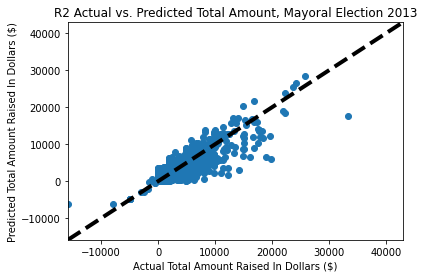

In [275]:
# %matplotlib inline
print(r_squared)
plt.scatter(y_test,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual Total Amount Raised In Dollars ($)')
plt.ylabel('Predicted Total Amount Raised In Dollars ($)')
plt.title('R2 Actual vs. Predicted Total Amount, Mayoral Election 2013')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.savefig('../ResourcesPredicted_Total_Amount_Regression_2013.png')

In [276]:
pred_df = X_test
pred_df['Predicted Total Amount'] = y_pred

/Users/Abir/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [277]:
pred_df.isnull().sum()

zipcode                   0
date                      0
contributiontype          0
city                      0
state                     0
amount                    0
matchamt                  0
expenditure_amount        0
Predicted Total Amount    0
dtype: int64

In [278]:
pred_graph = pred_df.groupby('zipcode').sum('redicted Total Amount').sort_values(by=['Predicted Total Amount'],ascending=True)

In [279]:
# pred_graph = pred_graph.reset_index()
pred_graph

,date,contributiontype,city,state,amount,matchamt,expenditure_amount,Predicted Total Amount
zipcode,,,,,,,,
1017,1166,10,1356,102,-4650.00,0.0,0,-4469.360000
752,5438,35,13881,357,-4125.00,0.0,0,-3736.040200
1078,5034,30,9360,302,-800.00,0.0,0,-692.250000
674,14135,72,2912,714,-1850.00,875.0,1140,-255.060000
2006,1347,5,144,38,0.00,0.0,500,0.000000
...,...,...,...,...,...,...,...,...
541,134297,701,168912,7038,123959.00,16860.0,348295,218196.428896
549,154974,917,208042,8670,146734.00,21194.0,17145,258251.858600
562,101101,536,132192,5508,187398.00,19460.0,41428,274325.854895


In [280]:
pred_graph.to_csv('../Resources/Predicted_Amounts.csv',index=False)